### Data Prepare (Metric, Config)

In [1]:
import pandas as pd

ex_metrics = pd.read_csv("/home/sein/mk_config/RocksDB/metrics/external/external_results_0.csv")

ex_metrics = ex_metrics.drop(['index'], axis = 1)
# ex_metrics = ex_metrics.round(3)
ex_metrics

,TIME,RATE,WAF,SA
0,21.8,4.77,8.7,72.17
1,25.9,4.02,8.9,55.83
2,52.0,2.00,7.5,34.21
3,53.6,1.94,10.5,56.94
4,20.7,5.02,11.6,98.79
...,...,...,...,...
19995,107.0,0.97,10.0,77.60
19996,41.3,2.52,6.2,73.62
19997,25.9,4.02,8.9,98.40
19998,31.4,3.31,8.7,81.18


In [2]:
import random
import glob
import os
import sys
import pandas as pd

cnt = 0

for xx in range(1,20001):

    path = "/home/sein/mk_config/RocksDB/configs/config{}.cnf".format(xx)
    a_all = pd.read_csv(path, sep="=", names=['Sample', 'value'])
    
    a_all = a_all.set_index("Sample")
    cur_all_df = a_all.T
    
    if cnt == 0:
        A_config = cur_all_df
    else :
        A_config = pd.concat([A_config, cur_all_df], axis=0)
    cnt += 1
A_config = A_config.reset_index()
A_config = A_config.drop(["index"],axis=1)
A_config = A_config.drop(["[rocksdb]"],axis=1)

# A_config = A_config.drop(A_config.columns[[0,1]], axis=1)


A_config

Sample,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,open_files,block_size,cache_index_and_filter_blocks,max_bytes_for_level_base,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio
0,6,16,1304576,3,2,1,0,3,24,44,...,10000,9216,false,5242880,11,1800192,1,8,0.1,0.67
1,2,14,911360,6,2,0,0,7,18,55,...,100000,15360,true,3145728,10,1729536,1,5,0.15,0.5
2,8,6,1474560,6,1,2,0,5,18,48,...,1000000,6144,false,4194304,9,1429504,1,6,0.05,0.36
3,12,8,550912,7,1,3,0,4,18,35,...,10000,3072,true,2097152,11,900096,1,7,0.05,0.63
4,11,15,1426432,5,1,0,0,5,23,59,...,10000,5120,false,5242880,8,560128,1,5,0.2,0.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,10000,8192,true,3145728,8,1148928,1,5,0.2,0.93
19996,7,8,826368,4,2,2,0,7,18,56,...,1000000,13312,true,7340032,10,922624,2,6,0.05,0.68
19997,6,12,730112,5,2,1,0,7,29,36,...,100000,8192,true,4194304,9,1661952,1,6,0,0.21
19998,9,11,1430528,6,1,3,0,4,25,34,...,100000,13312,true,3145728,9,834560,2,7,0,0.77


In [ ]:
A_config.columns = A_config.columns.str.strip()

A_config

In [4]:
for i in range (len(A_config)):
    if A_config['cache_index_and_filter_blocks'][i] == ' false':
       A_config['cache_index_and_filter_blocks'][i] = 0
        
    else:
        A_config['cache_index_and_filter_blocks'][i] = 1     
    
    

In [5]:
#### compression type = [' snappy', ' zlib', ' none', ' lz4' ]

for i in range (len(A_config)):
    if A_config['compression_type'][i] == ' snappy':
        A_config['compression_type'][i] = 0
        
    elif A_config['compression_type'][i] == ' zlib':
        A_config['compression_type'][i] = 1    
        
    elif A_config['compression_type'][i] == ' none' :
        A_config['compression_type'][i] = 2
    else:
        A_config['compression_type'][i] = 3
            
    

### Data Prepare (Config)

- all_samples = config + internal_metrics

In [6]:
all_samples = pd.concat([A_config, ex_metrics], axis=1)
all_samples

,max_background_compactions,max_background_flushes,write_buffer_size,max_write_buffer_number,min_write_buffer_number_to_merge,compaction_pri,compaction_style,level0_file_num_compaction_trigger,level0_slowdown_writes_trigger,level0_stop_writes_trigger,...,max_bytes_for_level_multiplier,target_file_size_base,target_file_size_multiplier,num_levels,memtable_bloom_size_ratio,compression_ratio,TIME,RATE,WAF,SA
0,6,16,1304576,3,2,1,0,3,24,44,...,11,1800192,1,8,0.1,0.67,21.8,4.77,8.7,72.17
1,2,14,911360,6,2,0,0,7,18,55,...,10,1729536,1,5,0.15,0.5,25.9,4.02,8.9,55.83
2,8,6,1474560,6,1,2,0,5,18,48,...,9,1429504,1,6,0.05,0.36,52.0,2.00,7.5,34.21
3,12,8,550912,7,1,3,0,4,18,35,...,11,900096,1,7,0.05,0.63,53.6,1.94,10.5,56.94
4,11,15,1426432,5,1,0,0,5,23,59,...,8,560128,1,5,0.2,0.09,20.7,5.02,11.6,98.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,15,551936,5,1,3,0,4,18,56,...,8,1148928,1,5,0.2,0.93,107.0,0.97,10.0,77.60
19996,7,8,826368,4,2,2,0,7,18,56,...,10,922624,2,6,0.05,0.68,41.3,2.52,6.2,73.62
19997,6,12,730112,5,2,1,0,7,29,36,...,9,1661952,1,6,0,0.21,25.9,4.02,8.9,98.40
19998,9,11,1430528,6,1,3,0,4,25,34,...,9,834560,2,7,0,0.77,31.4,3.31,8.7,81.18


### AutoEncoder (raw data + new data)

In [7]:
# ## 원본
# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.model_selection import train_test_split
# import torch
# from torch.utils.data import  TensorDataset, DataLoader

# # samples = pd.concat([configs,metrics], axis=1)
# scaler = MinMaxScaler()
# scaled_samples = scaler.fit_transform(all_samples)

# X_train, X_test = train_test_split(scaled_samples, test_size=0.2, shuffle=True)

# dataset_tr = TensorDataset(torch.tensor(X_train))
# dataset_te = TensorDataset(torch.tensor(X_test))

# trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=516, shuffle=True)
# testloader = torch.utils.data.DataLoader(dataset_te, batch_size=516, shuffle=True)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
## 1. config, metrics 따로 minmax
## config+internal 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import  TensorDataset, DataLoader
import numpy as np

# samples = pd.concat([configs,metrics], axis=1)
scaler_conf = MinMaxScaler()
scaler_metric = MinMaxScaler()
scaled_configs = scaler_conf.fit_transform(A_config)
scaled_metrics = scaler_metric.fit_transform(ex_metrics)

scaled_samples = np.concatenate([scaled_configs,scaled_metrics], axis=1)

X_train, X_test = train_test_split(scaled_samples, test_size=0.2, shuffle=True)

dataset_tr = TensorDataset(torch.tensor(X_train))
dataset_te = TensorDataset(torch.tensor(X_test))

trainloader = torch.utils.data.DataLoader(dataset_tr, batch_size=516, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset_te, batch_size=516, shuffle=True)


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### START

In [8]:

### 원본

import torch.nn as nn

class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()
    self.encoder = nn.Sequential(
        nn.Linear(26,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        # nn.BatchNorm1d(16),
        # nn.ReLU(),
        # nn.Linear(16,12),
        # nn.Dropout(p=0.2),
        # nn.BatchNorm1d(16),
        
        # nn.ReLU(),
        # nn.Linear(16,8),
        nn.Sigmoid())
    
    self.decoder = nn.Sequential(

        # nn.Linear(8,16),
        # nn.BatchNorm1d(16),
        # nn.ReLU(),
        # nn.Linear(12,16),
        # nn.BatchNorm1d(16),
        # nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16,16),
        nn.BatchNorm1d(16),
        nn.ReLU(),
        nn.Linear(16, 26), 
        nn.Sigmoid()
    )
  
  #인코더와 디코더 연산을 차례대로 수행하도록 설정 
  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [ ]:
# from torch import device
from torch import optim
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
model = Autoencoder().to(device)
# model = Autoencoder()


critertion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#lr=1e-4
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trainloss = []
validationloss = []
epoch_list = []

for epoch in range(10000):
  running_loss = 0
  model.train()
  
  for data in trainloader:
    inputs = data[0].float().to(device)
    optimizer.zero_grad()
    outputs = model(inputs) 
    loss = critertion(inputs, outputs)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_loss = running_loss / len(trainloader)
  trainloss.append(train_loss)
  # epoch_list.append(epoch)
  
  if epoch % 300 == 0:
    total_val_loss = 0
    model.eval()
    with torch.no_grad():
      running_loss = 0
      
      for data in testloader:
        inputs = data[0].float().to(device)
        # optimizer.zero_grad()
        outputs = model(inputs) 
        loss = critertion(inputs, outputs)
        running_loss += loss.item()
        inputs_np = inputs.cpu().detach().numpy()
        outputs_np = outputs.cpu().detach().numpy()
      total_val_loss = running_loss / len(testloader)
      validationloss.append(total_val_loss)
        
    print('[%d] tr_loss : %.3f | val_loss : %.3f' %(epoch +1, train_loss, total_val_loss))
    # print('MSE_Loss :', critertion(inputs, outputs) )

- Model Load

In [9]:
model_path = '/home/sein/mk_config/240319_fighting/autoencoder_wk0.pt'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

AE_model = Autoencoder().to(device)
load_weight = torch.load(model_path)
AE_model.load_state_dict(load_weight)

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)


with torch.no_grad():
    # AE_model.eval()
    encoded_vector_BO = AE_model.encoder(ex_scaled_new_Samples)
    # AE_model.decoder(newnewwnew.to('cuda'))
    print("BO's Encoded Latent Vector:", encoded_vector_BO)

BO's Encoded Latent Vector: tensor([[0.4787, 0.5013, 0.4416,  ..., 0.4204, 0.4764, 0.5776],
        [0.6258, 0.4557, 0.4879,  ..., 0.4734, 0.5567, 0.5701],
        [0.5174, 0.6042, 0.4708,  ..., 0.5423, 0.5128, 0.5140],
        ...,
        [0.4360, 0.4502, 0.4800,  ..., 0.4558, 0.5243, 0.4952],
        [0.4215, 0.4834, 0.4885,  ..., 0.4663, 0.5701, 0.4907],
        [0.4883, 0.4392, 0.5185,  ..., 0.4938, 0.5933, 0.5718]],
       device='cuda:0')


In [13]:
label_total = torch.tensor(X_test)
recon_total = AE_model(torch.tensor(X_test).to("cuda").float())

In [14]:
label_total_np = label_total.detach().cpu().numpy()
recon_total_np = recon_total.detach().cpu().numpy()

### AutoEncoder T-SNE (Reconstruction이 잘 되었는지 확인)

In [15]:
all_concat = np.concatenate([label_total_np,recon_total_np] )
all_concat.shape

(8000, 26)

In [17]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler,StandardScaler


n_components = 2

scaler = MinMaxScaler()
#input_array = scaler.fit_transform(label_total_np)


tsne_model = TSNE(n_components=n_components)

r = tsne_model.fit_transform(all_concat)

# print(tsne_model.fit_transform(input_array))

In [18]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# from sklearn.datasets import load_digit
import torch


n_components = 2

tsne_model = TSNE(n_components=n_components)

# r2 = tsne_model.fit_transform(torch.tensor(synthetic_data).cpu())
#scaler = MinMaxScaler()
#output_array = scaler.fit_transform(outputs_np)
r2 = tsne_model.fit_transform(recon_total_np)

 
# print(tsne_model.fit_transform(input_array))

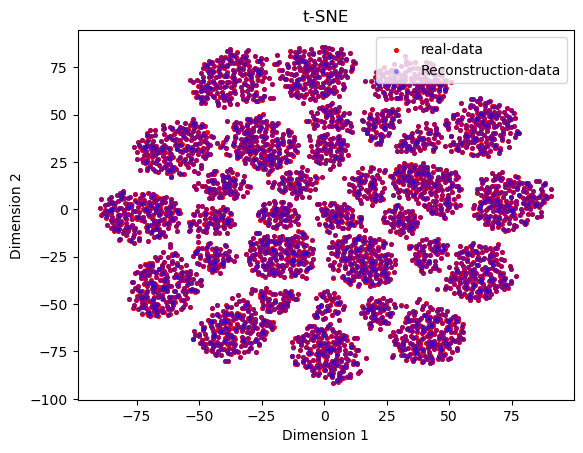

<Figure size 1000x1000 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt

# t-SNE 결과 시각화
plt.scatter(r[:4000, 0], r[:4000, 1], s=7, color='red',  label='real-data')
plt.scatter(r[4000:, 0], r[4000:, 1], s=7, alpha=0.3, color='blue', label='Reconstruction-data')

plt.title('t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')


plt.legend(loc='upper right')
plt.figure(figsize=(10,10))
plt.show()


In [ ]:
label_total_np[:3]
np.round(label_total_np[:3], 3)

In [ ]:
np.round(recon_total_np[:3], 3)

### Optimization in latent space (TabNet)
- Prediction

In [ ]:

import torch
import pandas as pd
import numpy as np

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)

with torch.no_grad():
    encoded_vector_BO = model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

In [ ]:
len(encoded_vector_BO)

# encoded_vector_BO[0]

In [ ]:
# # WAF, RATE
# # WAF, TIME
# ex_metrics_r = ex_metrics['RATE']
# ex_metrics_w = ex_metrics['WAF']
# ex_metrics_t = ex_metrics['TIME']
# ex_metrics_s = ex_metrics['SA']

# ex_metrics_p = pd.concat([ex_metrics_r, ex_metrics_w], axis=1)
# ex_metrics_pp = pd.concat([ex_metrics_w, ex_metrics_t], axis=1)
# ex_metrics_ppp = pd.concat([ex_metrics_t, ex_metrics_s], axis=1)

In [13]:
### TabNet
### X = encoded_vector_BO (Scaling O) , Y = metrics (Scaling X)
# scaler = MinMaxScaler()
# scaled_configs = scaler.fit_transform(configs)
# scaled_metrics = scaler.fit_transform(metrics.values.reshape(-1,1))
from sklearn.metrics import r2_score
from pytorch_tabnet.tab_model import TabNetRegressor
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
# seed = 525
# seed = 222
# seed = 428

# random.seed(seed)
# np.random.seed(seed)
# torch.manual_seed(seed)
# torch.cuda.manual_seed(seed)
# os.environ['PYTHONHASHSEED'] = str(seed)

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(ex_metrics)
# Y_latent = scaled_metrics

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


Y_scaler = MinMaxScaler().fit(lt_y_train)
scaled_lt_y_train = Y_scaler.transform(lt_y_train)
scaled_lt_y_test = Y_scaler.transform(lt_y_test)


# Tabnet 모델 생성
lt_regressor = TabNetRegressor(output_dim=4,verbose = 10,seed = 2024, optimizer_fn=torch.optim.AdamW) 
    
# 모델 학습
lt_regressor.fit(X_train=lt_X_train, y_train=scaled_lt_y_train,
              eval_set=[(lt_X_test, scaled_lt_y_test)],
              patience=100, 
              batch_size = 512,
              max_epochs=10000,
              eval_metric=['rmse'])

# 테스트 데이터로 예측
lt_predictions = lt_regressor.predict(lt_X_test)

# 성능 평가
print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, lt_predictions))



/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.31722 | val_0_rmse: 0.21646 |  0:00:00s
epoch 10 | loss: 0.02037 | val_0_rmse: 0.16566 |  0:00:11s
epoch 20 | loss: 0.01414 | val_0_rmse: 0.11581 |  0:00:22s
epoch 30 | loss: 0.01199 | val_0_rmse: 0.10342 |  0:00:34s
epoch 40 | loss: 0.01103 | val_0_rmse: 0.09815 |  0:00:45s
epoch 50 | loss: 0.00902 | val_0_rmse: 0.09086 |  0:00:57s
epoch 60 | loss: 0.00783 | val_0_rmse: 0.0825  |  0:01:09s
epoch 70 | loss: 0.00786 | val_0_rmse: 0.08363 |  0:01:20s
epoch 80 | loss: 0.00751 | val_0_rmse: 0.08068 |  0:01:32s
epoch 90 | loss: 0.00753 | val_0_rmse: 0.0805  |  0:01:43s
epoch 100| loss: 0.00712 | val_0_rmse: 0.07926 |  0:01:52s
epoch 110| loss: 0.00716 | val_0_rmse: 0.08307 |  0:02:01s
epoch 120| loss: 0.00692 | val_0_rmse: 0.07801 |  0:02:10s
epoch 130| loss: 0.00678 | val_0_rmse: 0.07989 |  0:02:19s
epoch 140| loss: 0.00666 | val_0_rmse: 0.08003 |  0:02:27s
epoch 150| loss: 0.0065  | val_0_rmse: 0.08457 |  0:02:35s
epoch 160| loss: 0.00655 | val_0_rmse: 0.08148 |  0:02:4

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


BEST VALID SCORE :  0.04686507183340486
R2 SCORE :  0.8684690522863038


In [14]:
print(r2_score(scaled_lt_y_test[:,0], lt_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], lt_predictions[:,1]))
print(r2_score(scaled_lt_y_test[:,2], lt_predictions[:,2]))
print(r2_score(scaled_lt_y_test[:,3], lt_predictions[:,3]))

0.8821361178190404
0.8568677184639966
0.7521593748377838
0.9827129980243953


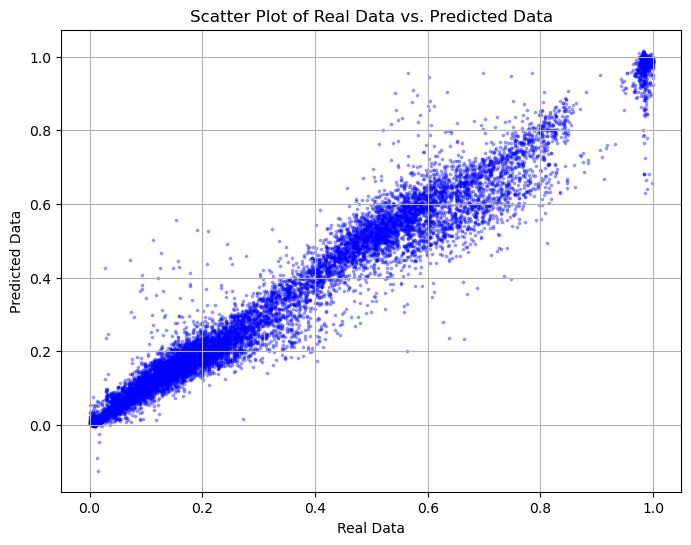

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_lt_y_test, lt_predictions, color='blue', alpha=0.3, s=3)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Scatter Plot of Real Data vs. Predicted Data')
plt.grid(True)
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(scaled_lt_y_test.reshape(-1,1).squeeze(),label='Test Data', color='lightskyblue')
sns.kdeplot(lt_predictions.reshape(-1,1).squeeze(), label='Prediction Data', color='palevioletred')
plt.legend(loc='upper right')

In [15]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [53]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        # self.metrics0 = metrics0
        # self.metrics1 = metrics1
        # self.metrics2 = metrics2
        # self.metrics3 = metrics3
        self.regressor = regressor
        # self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        KB = 1024
        MB = 1024 * 1024
        self.option = {
        "max_background_compactions": [i for i in range(1, 17)], # D:1, B:4 ~ 32
        "max_background_flushes": [i for i in range(1, 17)], #D:1, B:4~32
        "write_buffer_size": [s * KB for s in range(512, 2048)], #D:64M, B:0.25M ~ 1M
        "max_write_buffer_number": [i for i in range(2, 9)], #D:2, B:2~16
        "min_write_buffer_number_to_merge": [i for i in range(1, 3)], #D:1
        "compaction_pri": { #D:0
            "kByCompensatedSize" : 0,
            "kOldestLargestSeqFirst" : 1,
            "kOldestSmallestSeqFirst" : 2,
            "kMinOverlappingRatio" : 3
        },
        "compaction_style": { #D:0
            "kCompactionStyleLevel" : 0, 
            "kCompactionStyleUniversal" : 1,
            "kCompactionStyleFIFO" : 2,
            "kCompactionStyleNone" : 3
        },
        "level0_file_num_compaction_trigger": [i for i in range(2, 9)], #D:4, B:2 ~ 8
        "level0_slowdown_writes_trigger": [i for i in range(16, 33)], #D:20, B:16 ~ 64
        "level0_stop_writes_trigger": [i for i in range(32, 65)], #D:36, B:64 ~ 128
        "compression_type": {
            "snappy" : 0,
            "zlib" : 1,
            "lz4" : 2,
            "none" : 3}, #D:"snappy", B:no "bzip2"
        "bloom_locality": [0, 1], #D:0
        "open_files": [-1, 10000, 100000, 1000000], #D:-1 B:-1
        "block_size": [s * KB for s in range(2, 17)], #D:4096, B:4096 ~ 32768
        "cache_index_and_filter_blocks": 
            {"true" : 1, 
             "false" : 0
             },#D:false
        "memtable_bloom_size_ratio": [0, 0.05, 0.1, 0.15, 0.2], #D:0
        "compression_ratio": [i/100 for i in range(100)], #D:0.5, B:0.1 ~ 0.9
        "max_bytes_for_level_base": [s * MB for s in range(2, 9)], #D:256M, B:1M ~ 16M
        "max_bytes_for_level_multiplier": [i for i in range(8, 13)], #D:10, B:6 ~ 10
        "target_file_size_base": [s * KB for s in range(512, 2049)], #D:64M, B:0.25M ~ 4M
        "target_file_size_multiplier": [ i for i in range(1, 3)], #D:1, B:1 ~ 2
        "num_levels": [5, 6, 7, 8] #D:7, B:7
    }

   
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
            
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = -res[:,0]
        target_res1 = res[:,1]
        target_res2 = -res[:,2]
        target_res3 = -res[:,3]
        
        target_0 = 5.32 / target_res0
        target_1 = target_res1 / 19.5
        target_2 = target_res2 / 10.6
        target_3 = target_res3 / 56.84
        
        
        weights = [0.25, 0.25, 0.25, 0.25]  # 가중치 설정
        # target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))
        target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))

        
        return target_value
        # return target_value.squeeze()
    
        # return res
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2024)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=0.0, xi=0.00001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=80, acquisition_function=self.acquisition_function)
    

### Bayesian Optimization

In [54]:
tuner1 = BO(iteration=300, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=ex_metrics,
           regressor=lt_regressor
           )
# tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | -0.5755   | 0.588     | 0.6991    | 0.1882    | 0.04381   | 0.205     | 0.1061    | 0.7272    | 0.6794    | 0.4738    | 0.4483    | 0.01911   | 0.7526    | 0.6024    | 0.9618    | 0.6644    | 0.6066    |
| 2         | -3.871    | 0.4492    | 0.2254    | 0.6702    | 0.7358    | 0.258     | 0.09554   | 0.9609    | 0.2518    | 0.2822    | 0.7683    | 0.7979    | 0.544     | 0.3827    | 0.3817    | 0.2858    | 0.7403    |
| 3         | -1.329    | 0.239     | 0.4377    | 0.8835    | 0.2893    | 0.7845    | 0.759     | 0.4178    | 0.2258    | 0.4201

In [18]:
ex_data =[ 0.6827    , 0.3153    , 0.16      , 0.7015    , 0.9904    , 0.07303   , 0.872     , 0.8077    , 0.4677    , 0.2999    , 0.2323    , 0.06808   , 0.6638    , 0.6064    , 0.7464    , 0.3511  ]

In [26]:
ex_data = [0.4568    , 0.5792    , 0.2214    , 0.7983    , 0.8343    , 0.3122    , 0.9042    , 0.7253    , 0.6341    , 0.6256    , 0.3008    , 0.7129    , 0.6821    , 0.4095    , 0.8334    , 0.1491   ]

In [34]:
ex_data = [0.166     , 0.4564    , 0.09578   , 0.827     , 0.513     , 0.6991    , 0.6692    , 1.0       , 0.7972    , 0.2889    , 0.0       , 0.3053    , 0.2915    , 0.3611    , 0.6382    , 0.7007    ]

In [45]:
ex_data= [ 0.0       , 0.2025    , 0.3126    , 0.3283    , 0.3499    , 0.7397    , 0.6553    , 0.8132    , 0.7443    , 0.1799    , 0.2791    , 0.3662    , 0.3365    , 0.5038    , 0.6229    , 0.4789  ]

In [46]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    AE_model.eval()
    decode_value = AE_model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[9.9749e-01, 1.0000e+00, 7.4283e-01, 3.6152e-08, 1.0000e+00, 8.2928e-04,
         6.8843e-15, 8.6626e-01, 9.9751e-01, 2.4936e-02, 9.9996e-01, 2.4021e-31,
         3.4121e-20, 9.9611e-01, 9.9969e-01, 7.5133e-09, 9.8205e-01, 1.8591e-01,
         1.0000e+00, 6.0153e-03, 8.5840e-01, 9.8867e-01, 1.5263e-03, 8.7559e-01,
         5.5884e-01, 9.9999e-01]], device='cuda:0')


In [47]:
converted_values = [float(value) for value in decode_value[0]]


In [48]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:22] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))

# rescaled_bo_config = scaler.inverse_transform(real_v)




In [49]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,15.962343574,15.999967813,1691894.968994141,2.000000217,2.000000000,0.002487830,0.000000000,7.197584271,31.960224152,32.797964394,...,-1.000000000,16328.300781250,0.999688745,2097152.047269888,11.928212404,816705.898437500,2.000000000,5.018046027,0.171679652,0.978786773


In [50]:
for i in range (len(A_config.columns)):
    print('"{}" : {},'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

"max_background_compactions" : 16,
"max_background_flushes" : 16,
"write_buffer_size" : 1691895,
"max_write_buffer_number" : 2,
"min_write_buffer_number_to_merge" : 2,
"compaction_pri" : 0,
"compaction_style" : 0,
"level0_file_num_compaction_trigger" : 7,
"level0_slowdown_writes_trigger" : 32,
"level0_stop_writes_trigger" : 33,
"compression_type" : 3,
"bloom_locality" : 0,
"open_files" : -1,
"block_size" : 16328,
"cache_index_and_filter_blocks" : 1,
"max_bytes_for_level_base" : 2097152,
"max_bytes_for_level_multiplier" : 12,
"target_file_size_base" : 816706,
"target_file_size_multiplier" : 2,
"num_levels" : 5,
"memtable_bloom_size_ratio" : 0,
"compression_ratio" : 1,


### Model Load

In [10]:
model_path = '/home/sein/mk_config/240319_fighting/autoencoder_wk0.pt'
    
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# model =Autoencoder().to(device)
test0_model = Autoencoder().to(device)
load_weight = torch.load(model_path)
test0_model.load_state_dict(load_weight)

ex_scaled_new_Samples = torch.Tensor(scaled_samples).to(device)

with torch.no_grad():
    encoded_vector_BO = test0_model.encoder(ex_scaled_new_Samples)
    print("BO'S Encoded Latent Vector:", encoded_vector_BO)

BO'S Encoded Latent Vector: tensor([[0.4787, 0.5013, 0.4416,  ..., 0.4204, 0.4764, 0.5776],
        [0.6258, 0.4557, 0.4879,  ..., 0.4734, 0.5567, 0.5701],
        [0.5174, 0.6042, 0.4708,  ..., 0.5423, 0.5128, 0.5140],
        ...,
        [0.4360, 0.4502, 0.4800,  ..., 0.4558, 0.5243, 0.4952],
        [0.4215, 0.4834, 0.4885,  ..., 0.4663, 0.5701, 0.4907],
        [0.4883, 0.4392, 0.5185,  ..., 0.4938, 0.5933, 0.5718]],
       device='cuda:0')


In [11]:
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.metrics import r2_score


saving_path_name = "/home/sein/mk_config/240319_fighting/tabnet_model_wk0.zip"
# saved_filepath = lt_regressor.save_model(saving_path_name)

test_regressor = TabNetRegressor(output_dim=4,verbose = 10,seed = 2024, optimizer_fn=torch.optim.AdamW) 
test_regressor.load_model(saving_path_name)

X_latent = np.array(encoded_vector_BO.cpu().numpy())
Y_latent = np.array(ex_metrics)
# Y_latent = scaled_metrics

lt_X_train, lt_X_test, lt_y_train, lt_y_test = train_test_split(X_latent,Y_latent,test_size=0.2, shuffle=True)


Y_scaler = MinMaxScaler().fit(lt_y_train)
scaled_lt_y_train = Y_scaler.transform(lt_y_train)
scaled_lt_y_test = Y_scaler.transform(lt_y_test)

# 테스트 데이터로 예측
test_predictions = test_regressor.predict(lt_X_test)

# 성능 평가
# print('BEST VALID SCORE : ', lt_regressor.best_cost)
print('R2 SCORE : ' , r2_score(scaled_lt_y_test, test_predictions))


R2 SCORE :  0.8593857823228425


/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")


In [ ]:
print(r2_score(scaled_lt_y_test[:,0], test_predictions[:,0]))
print(r2_score(scaled_lt_y_test[:,1], test_predictions[:,1]))
print(r2_score(scaled_lt_y_test[:,2], test_predictions[:,2]))
print(r2_score(scaled_lt_y_test[:,3], test_predictions[:,3]))

In [ ]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [72]:
### BO 코드
from sklearn.preprocessing import MinMaxScaler
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

class BO(object):
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        # self.metrics0 = metrics0
        # self.metrics1 = metrics1
        # self.metrics2 = metrics2
        # self.metrics3 = metrics3
        self.regressor = regressor
        # self.config_info_path = config_info_path
        # self.min_max_same_knobs = []
        
        self._get_config_info()
        self._init_pbounds()
    
    def _get_config_info(self):
        KB = 1024
        MB = 1024 * 1024
        self.option = {
        "max_background_compactions": [i for i in range(1, 17)], # D:1, B:4 ~ 32
        "max_background_flushes": [i for i in range(1, 17)], #D:1, B:4~32
        "write_buffer_size": [s * KB for s in range(512, 2048)], #D:64M, B:0.25M ~ 1M
        "max_write_buffer_number": [i for i in range(2, 9)], #D:2, B:2~16
        "min_write_buffer_number_to_merge": [i for i in range(1, 3)], #D:1
        "compaction_pri": { #D:0
            "kByCompensatedSize" : 0,
            "kOldestLargestSeqFirst" : 1,
            "kOldestSmallestSeqFirst" : 2,
            "kMinOverlappingRatio" : 3
        },
        "compaction_style": { #D:0
            "kCompactionStyleLevel" : 0, 
            "kCompactionStyleUniversal" : 1,
            "kCompactionStyleFIFO" : 2,
            "kCompactionStyleNone" : 3
        },
        "level0_file_num_compaction_trigger": [i for i in range(2, 9)], #D:4, B:2 ~ 8
        "level0_slowdown_writes_trigger": [i for i in range(16, 33)], #D:20, B:16 ~ 64
        "level0_stop_writes_trigger": [i for i in range(32, 65)], #D:36, B:64 ~ 128
        "compression_type": {
            "snappy" : 0,
            "zlib" : 1,
            "lz4" : 2,
            "none" : 3}, #D:"snappy", B:no "bzip2"
        "bloom_locality": [0, 1], #D:0
        "open_files": [-1, 10000, 100000, 1000000], #D:-1 B:-1
        "block_size": [s * KB for s in range(2, 17)], #D:4096, B:4096 ~ 32768
        "cache_index_and_filter_blocks": 
            {"true" : 1, 
             "false" : 0
             },#D:false
        "memtable_bloom_size_ratio": [0, 0.05, 0.1, 0.15, 0.2], #D:0
        "compression_ratio": [i/100 for i in range(100)], #D:0.5, B:0.1 ~ 0.9
        "max_bytes_for_level_base": [s * MB for s in range(2, 9)], #D:256M, B:1M ~ 16M
        "max_bytes_for_level_multiplier": [i for i in range(8, 13)], #D:10, B:6 ~ 10
        "target_file_size_base": [s * KB for s in range(512, 2049)], #D:64M, B:0.25M ~ 4M
        "target_file_size_multiplier": [ i for i in range(1, 3)], #D:1, B:1 ~ 2
        "num_levels": [5, 6, 7, 8] #D:7, B:7
    }

   
    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
            
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)        
        # scaled_X = self.X_scaler.transform([x])
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = -res[:,0]  #TIME
        target_res1 = res[:,1]  #RATE
        target_res2 = -res[:,2]  #WAF
        target_res3 = -res[:,3]  #SA
        
        # target_0 = 19.5 / target_res0
        # target_1 = target_res1 / 5.32
        # target_2 = 10.6 / target_res2
        # target_3 = 56.84 / target_res3
        
        
        weights = [0.25,0.25,0.25,0.25]  # 가중치 설정
        # target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))
        # target_value = np.sum([target_0, target_1, target_2, target_3] * np.array(weights))
        target_value = np.sum([target_res0, target_res1, target_res2, target_res3] * np.array(weights))
        

        
        return target_value
        # return target_value.squeeze()
    
        # return res
    
    def tune(self):
        self.optimizer = BayesianOptimization(f=self._target_function, pbounds=self.pbounds, verbose=2, random_state=2024)

        self.acquisition_function = UtilityFunction(kind="ei", kappa=3.5, xi=0.0001)
        
        self.optimizer.maximize(n_iter=self.iteration, init_points=150, acquisition_function=self.acquisition_function)
    

In [73]:
tuner1 = BO(iteration=500, 
           configs=encoded_vector_BO.cpu().numpy(),
           metrics=ex_metrics,
           regressor=lt_regressor
           )
# tuner1.train_regression_model()
tuner1.tune()
# tuner1.plot_history()

|   iter    |  target   |     0     |     1     |    10     |    11     |    12     |    13     |    14     |    15     |     2     |     3     |     4     |     5     |     6     |     7     |     8     |     9     |
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
| 1         | 0.2676    | 0.588     | 0.6991    | 0.1882    | 0.04381   | 0.205     | 0.1061    | 0.7272    | 0.6794    | 0.4738    | 0.4483    | 0.01911   | 0.7526    | 0.6024    | 0.9618    | 0.6644    | 0.6066    |
| 2         | 0.2135    | 0.4492    | 0.2254    | 0.6702    | 0.7358    | 0.258     | 0.09554   | 0.9609    | 0.2518    | 0.2822    | 0.7683    | 0.7979    | 0.544     | 0.3827    | 0.3817    | 0.2858    | 0.7403    |
| 3         | -0.2834   | 0.239     | 0.4377    | 0.8835    | 0.2893    | 0.7845    | 0.759     | 0.4178    | 0.2258    | 0.4201

In [ ]:
ex_data = [0.4551    , 0.9454    , 0.8984    , 0.3235    , 0.8925    , 0.2914    , 0.4762    , 0.2104    , 0.2474    , 0.2784    , 0.3107    , 0.02286   , 0.6829    , 0.5923    , 0.3004    , 0.7391    ]

In [50]:
ex_data = [0.4714    , 0.937     , 0.8382    , 0.2875    , 0.8038    , 0.3098    , 0.2918    , 0.3429    , 0.3984    , 0.4336    , 0.009008  , 0.04178   , 0.9818    , 0.8567    , 0.1136    , 0.4123    ]

In [28]:
ex_data = [0.1918    , 0.4678    , 0.9676    , 0.6908    , 0.8785    , 0.8291    , 0.2738    , 0.2047    , 0.3502    , 0.3056    , 0.4178    , 0.9907    , 0.677     , 0.03657   , 0.8104    , 0.9123   ]

In [41]:
ex_data =[0.6131    , 0.01484   , 0.909     , 0.4768    , 0.8135    , 0.7238    , 0.6091    , 0.5951    , 0.888     , 0.3388    , 0.3517    , 0.8444    , 0.8503    , 0.4135    , 0.9718    , 0.8037    ]

In [64]:
ex_data = [0.7988    , 0.6418    , 0.7768    , 0.2392    , 0.5833    , 0.8218    , 0.8896    , 0.9621    , 0.7748    , 0.2006    , 0.6665    , 0.3949    , 0.567     , 0.1535    , 0.3986    , 0.6999   ]

In [74]:
ex_data =[0.9667    , 0.5796    , 0.7167    , 0.1829    , 0.5671    , 0.8799    , 0.9321    , 1.0       , 0.8242    , 0.06778   , 0.6415    , 0.5889    , 0.5255    , 0.077     , 0.3853    , 0.7964   ]

In [42]:
len(ex_data)

16

In [75]:
# Decoding to real dimension

ex_data = torch.tensor(ex_data).unsqueeze(0)
ex_data = ex_data.to('cuda:0')  # ex_data를 GPU로 이동

with torch.no_grad():
    AE_model.eval()
    decode_value = AE_model.decoder(ex_data)
    print("Decoded Value:", decode_value)

Decoded Value: tensor([[5.7124e-01, 9.9999e-01, 8.4725e-01, 4.2916e-05, 1.0000e+00, 6.5659e-01,
         5.4686e-09, 5.2618e-06, 9.2681e-01, 2.6290e-01, 9.9834e-01, 1.0000e+00,
         5.9069e-13, 3.3758e-01, 9.9519e-01, 2.6675e-01, 9.9692e-01, 8.9430e-01,
         1.0000e+00, 8.6021e-03, 9.9931e-01, 8.6937e-02, 5.1690e-04, 9.4610e-01,
         5.6207e-01, 9.0652e-01]], device='cuda:0')


In [76]:
len(decode_value)

1

In [77]:
converted_values = [float(value) for value in decode_value[0]]


In [67]:
converted_values

[0.7352843880653381,
 0.9998934268951416,
 0.8211991190910339,
 0.06336087733507156,
 1.0,
 0.582119882106781,
 4.815397414148492e-09,
 1.3074285561742727e-05,
 0.672799825668335,
 0.4512750804424286,
 0.9999552965164185,
 0.8443116545677185,
 2.0666106138378382e-05,
 0.4544863998889923,
 0.9153298139572144,
 0.9914809465408325,
 0.999127209186554,
 0.9101570248603821,
 0.9999960660934448,
 0.001799492398276925,
 0.9942104816436768,
 0.005178835708647966,
 0.000562345318030566,
 0.9401607513427734,
 0.3962109684944153,
 0.31069138646125793]

In [78]:
df_converted_values = pd.DataFrame(converted_values)

real_bo_config = df_converted_values[:22] 
real_v = np.array(real_bo_config)

rescaled_bo_config = scaler_conf.inverse_transform(real_v.reshape(1,-1))

# rescaled_bo_config = scaler.inverse_transform(real_v)




In [79]:
rescaled_bo_config

array([[ 9.56854290e+00,  1.59998999e+01,  1.85603485e+06,
         2.00025750e+00,  2.00000000e+00,  1.96976316e+00,
         5.46860424e-09,  2.00003157e+00,  3.08290071e+01,
         4.04126472e+01,  2.99501538e+00,  1.00000000e+00,
        -9.99999409e-01,  6.88758185e+03,  9.95189428e-01,
         3.77537019e+06,  1.19876671e+01,  1.93089828e+06,
         1.99999988e+00,  5.02580641e+00,  1.99861479e-01,
         8.60672566e-02]])

In [80]:
pd.options.display.float_format = '{:.9f}'.format #지수함수 없이 출력하는 option

rescaled_actual_pd = pd.DataFrame(rescaled_bo_config)
rescaled_actual_pd

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,9.568542898,15.999899864,1856034.849975586,2.000257496,2.000000000,1.969763160,0.000000005,2.000031571,30.829007149,40.412647247,...,-0.999999409,6887.581848145,0.995189428,3775370.187500000,11.987667084,1930898.281250000,1.999999881,5.025806413,0.199861479,0.086067257


In [81]:
for i in range (len(A_config.columns)):
    print('"{}" : {},'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))

"max_background_compactions" : 10,
"max_background_flushes" : 16,
"write_buffer_size" : 1856035,
"max_write_buffer_number" : 2,
"min_write_buffer_number_to_merge" : 2,
"compaction_pri" : 2,
"compaction_style" : 0,
"level0_file_num_compaction_trigger" : 2,
"level0_slowdown_writes_trigger" : 31,
"level0_stop_writes_trigger" : 40,
"compression_type" : 3,
"bloom_locality" : 1,
"open_files" : -1,
"block_size" : 6888,
"cache_index_and_filter_blocks" : 1,
"max_bytes_for_level_base" : 3775370,
"max_bytes_for_level_multiplier" : 12,
"target_file_size_base" : 1930898,
"target_file_size_multiplier" : 2,
"num_levels" : 5,
"memtable_bloom_size_ratio" : 0,
"compression_ratio" : 0,


In [ ]:
# 결과를 저장할 파일 경로 설정
file_path = '/home/sein/mk_config/240324_RocksDB_OURS_ch.tf_config/WK0_0.txt'

# 파일 열기
with open(file_path, 'w') as file:
    # 각 열의 이름과 결과를 파일에 쓰기
    for i in range(len(A_config.columns)):
        file.write('{} = {}\n'.format(A_config.columns[i], round(rescaled_actual_pd.iloc[0][i])))



In [ ]:
latent_pd = pd.DataFrame(encoded_vector_BO.cpu().numpy())
latent_pd_T = latent_pd.T
# latent_pd_T.index

In [ ]:
from botorch.models import SingleTaskGP
from botorch.optim import optimize_acqf
from botorch.acquisition import ExpectedImprovement
from botorch.utils.transforms import unnormalize
import numpy as np
import torch
    
class BO(object):
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        # self.configs = configs
        # self.metrics = torch.tensor(metrics.values)
        
        
        self.configs = torch.tensor(configs, dtype=torch.float32) 
        self.metrics = torch.tensor(metrics.values, dtype=torch.float32)
        self.regressor = regressor
        self._init_bounds()
    
    def _init_bounds(self):
        self.bounds = {}
        
        for param in latent_pd_T.index:
            self.bounds[str(param)] = (0, 1)
            
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = res[:,0]
        target_res1 = res[:,1]
        target_res2 = res[:,2]
        target_res3 = res[:,3]
        
        target_0 = 19.5 / target_res0
        target_1 = target_res1 / 5.32
        target_2 = 10.6 / target_res2
        target_3 = 56.84 / target_res3
        
        target_value = np.sum([target_0, target_1, target_2, target_3])
        return target_value
    

    def tune(self):
        # Define the Gaussian process model
        model = SingleTaskGP(self.configs, self.metrics)
        # Define the acquisition function
        # acquisition_function = ExpectedImprovement(model,best_f=0.2)
        acquisition_function = UpperConfidenceBound(model,beta=0.2)
        
        # Perform Bayesian optimization
        best_x, _ = optimize_acqf(
            acquisition_function,
            bounds=self.bounds,
            q=1,
            num_restarts=10,
            raw_samples=50
            # options={"batch_limit": 5, "maxiter": 200},
        )
        best_x_unnorm = unnormalize(best_x, self.bounds)
        return best_x_unnorm.numpy()


In [ ]:
bo = BO(iteration=40, 
        configs=encoded_vector_BO.cpu().numpy(), 
        metrics=ex_metrics, 
        regressor=test_regressor
        )

bo.tune()
# print("Best Parameters:", best_params)

In [ ]:
import numpy as np
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_model
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf
import botorch.fit as fit
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.likelihoods import GaussianLikelihood

class BO_Tuner_Botorch:
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.regressor = regressor
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = res[:,0]  #TIME
        target_res1 = res[:,1]  #RATE
        target_res2 = res[:,2]  #WAF
        target_res3 = res[:,3]  #SA
        
        target_0 = 19.5 / target_res0
        target_1 = target_res1 / 5.32
        target_2 = 10.6 / target_res2
        target_3 = 56.84 / target_res3
        
        target_value = np.sum([target_0, target_1, target_2, target_3])
        
        
        return target_value
    
    def tune(self):
        bounds = []  
        for _ in range(len(self.configs)):
            bounds.append((0, 1))  
        
        pbounds = {}
        for i, config in enumerate(self.configs):
            pbounds[str(i)] = bounds[i]
        
        configs_array = np.array(self.configs)
        metrics_array = np.array(self.metrics)
        model = SingleTaskGP(
            torch.tensor(configs_array, dtype=torch.float),
            torch.tensor(metrics_array, dtype=torch.float))
        
        likelihood = GaussianLikelihood()
        mll = ExactMarginalLogLikelihood(likelihood, model)

        # mll = fit.fit_gpytorch_model(mll)

        for _ in range(self.iteration):
            # Fit the model
            fit_gpytorch_model(model)
            

            EI = ExpectedImprovement(model, best_f=0.2)  
            
            # Optimize the acquisition function
            candidate, acq_value = optimize_acqf(EI, bounds=torch.tensor(bounds))
            
            # Evaluate the target function at the candidate point
            new_obj = self._target_function(**{str(i): value.item() for i, value in enumerate(candidate)})
            
            # Update the model with the new data point
            train_x = torch.cat([train_x, candidate.unsqueeze(0)])
            train_y = torch.cat([train_y, torch.tensor([[new_obj]])])
            model = SingleTaskGP(train_x, train_y, likelihood)
            mll = ExactMarginalLogLikelihood(likelihood, model)
            fit_gpytorch_model(mll)
        
        # Return the best configuration found
        best_config = candidate.tolist()
        return best_config




In [12]:
import numpy as np
import torch
from botorch.models import SingleTaskGP
from botorch.fit import fit_gpytorch_model
from botorch.acquisition import ExpectedImprovement
from botorch.optim import optimize_acqf
from gpytorch.mlls import ExactMarginalLogLikelihood
from gpytorch.likelihoods import GaussianLikelihood

class BO_Tuner_Botorch:
    def __init__(self, iteration, configs, metrics, regressor):
        self.iteration = iteration
        self.configs = configs
        self.metrics = metrics
        self.regressor = regressor
    
    def _target_function(self, **kwargs):
        x = np.fromiter(kwargs.values(), dtype=float)
        x = x.reshape(1, -1)
        res = self.regressor.predict(x)
        
        target_res0 = res[:,0]  # TIME
        target_res1 = res[:,1]  # RATE
        target_res2 = res[:,2]  # WAF
        target_res3 = res[:,3]  # SA
        
        target_0 = 19.5 / target_res0
        target_1 = target_res1 / 5.32
        target_2 = 10.6 / target_res2
        target_3 = 56.84 / target_res3
        
        target_value = np.sum([target_0, target_1, target_2, target_3])
        
        return target_value

    def _init_pbounds(self):
        self.pbounds = {}
        
        for v in latent_pd_T.index:
            self.pbounds[str(v)] = (0, 1)
            
        
    def tune(self):
        
        # Initialize the model (SingleTaskGP)
        configs_array = np.array(self.configs)
        metrics_array = np.array(self.metrics)
        train_x = torch.tensor(configs_array, dtype=torch.float)
        train_y = torch.tensor(metrics_array, dtype=torch.float)
        likelihood = GaussianLikelihood()
        model = SingleTaskGP(train_x, train_y, likelihood)
        mll = ExactMarginalLogLikelihood(likelihood, model)
        
        # Fit the model
        # fit_gpytorch_model(mll)
        
        # Bayesian Optimization loop
        for _ in range(self.iteration):
            # Define the acquisition function (Expected Improvement)
            EI = ExpectedImprovement(model, best_f=0.2)  # Update best_f as needed
            
            # Optimize the acquisition function
            candidate, acq_value = optimize_acqf(EI, bounds=torch.tensor(bounds))
            
            # Evaluate the target function at the candidate point
            new_obj = self._target_function(**{str(i): value.item() for i, value in enumerate(candidate)})
            
            # # Update the model with the new data point
            # train_x = torch.cat([train_x, candidate.unsqueeze(0)])
            # train_y = torch.cat([train_y, torch.tensor([[new_obj]])])
            model = SingleTaskGP(train_x, train_y, likelihood)
            mll = ExactMarginalLogLikelihood(likelihood, model)
            fit_gpytorch_model(mll)
        
        # Return the best configuration found
        best_config = candidate.tolist()
        return best_config


In [13]:
# Usage example
tuner = BO_Tuner_Botorch(iteration=3, 
                         configs=encoded_vector_BO.cpu().numpy(), 
                         metrics=ex_metrics, 
                         regressor=test_regressor)
best_config = tuner.tune()
# print("Best configuration:", best_config)

/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/botorch/models/gpytorch.py:129: UserWarning: The model inputs are of type torch.float32. It is strongly recommended to use double precision in BoTorch, as this improves both precision and stability and can help avoid numerical errors. See https://github.com/pytorch/botorch/discussions/1444
  warnings.warn(_get_single_precision_warning(X.dtype), UserWarning)
/home/sein/anaconda3/envs/py39/lib/python3.9/site-packages/botorch/models/utils/assorted.py:201: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


: 